# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [158]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

import numpy as np

import math

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
# Random variates of given type, for random numbers without any bias

x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.0134333  2.5022958  2.6837075  2.36783248 2.84309166 2.66221886
 2.67560588 2.47806456 2.82768822 2.08868866]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

(array([0.22559844, 0.22559844, 0.12305369, 0.16407159, 0.18458054,
        0.26661634, 0.14356264, 0.20508949, 0.28712529, 0.22559844]),
 array([10.06096533, 10.54855735, 11.03614937, 11.5237414 , 12.01133342,
        12.49892544, 12.98651746, 13.47410949, 13.96170151, 14.44929353,
        14.93688556]),
 <BarContainer object of 10 artists>)

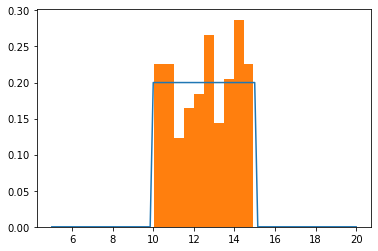

In [52]:
# Reference: https://www.coursera.org/lecture/probability-theory-statistics/generating-and-visualizing-continuous-random-variables-with-python-A0WoC

# your code here

bottom = 10
ceiling = 15

# Avoid collision 
count = uniform.rvs(size=100)

random_1 = bottom + (ceiling-bottom)*count

# Line function
X = uniform(10, 5)
x = np.linspace(5, 20, 100)

# Probability Density Function Plot
plt.plot(x, X.pdf(x))
plt.hist(random_1, bins = 10, density = True)
#plt.plot(random_1, [0.1] * len(random_1), 'o')

(array([0.02067682, 0.01947235, 0.01866936, 0.01846862, 0.02308577,
        0.02328652, 0.02168055, 0.0192716 , 0.01907086, 0.0170634 ]),
 array([10.06906446, 15.05048762, 20.03191079, 25.01333396, 29.99475713,
        34.9761803 , 39.95760347, 44.93902663, 49.9204498 , 54.90187297,
        59.88329614]),
 <BarContainer object of 10 artists>)

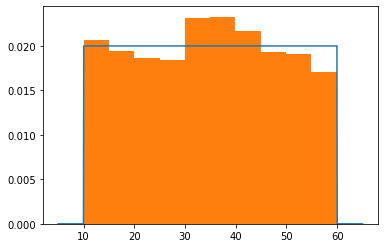

In [68]:

bottom = 10
ceiling = 60
count = uniform.rvs(size=1000)

random_1 = bottom + (ceiling-bottom)*count

# Line function
X = uniform(10, 50)
x = np.linspace(5, 65, 1000)

# Probability Density Function Plot
plt.plot(x, X.pdf(x))
plt.hist(random_1, bins = 10, density = True)
#plt.plot(random_1, [0.01] * len(random_1), 'o')

How are the two distributions different?

In [20]:
# your answer below

# The greater the sample size, the better the approximation

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

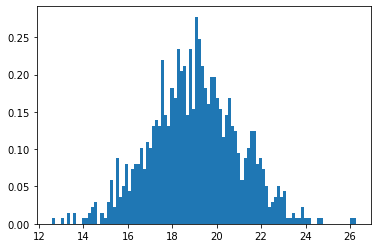

In [132]:
# your code here

# Creating a function that generates normally distributed random numbers
'''

A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation

'''

# Standard Deviation Normal
# barplots 
l = -1
r = 1
count = norm.rvs(loc = 10, scale = 1, size=1000)

random_1 = l + (r - l)*count

plt.hist(random_1, bins = 100, density = True)
plt.show()

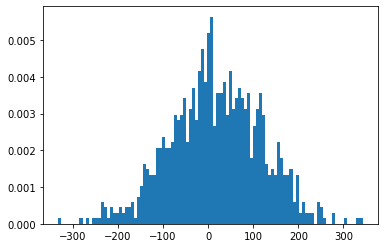

In [133]:
# barplots 
l = -1
r = 1
count = norm.rvs(loc = 10, scale = 50, size=1000)

random_1 = l + (r - l)*count

plt.hist(random_1, bins = 100, density = True)
plt.show()

How are the two distributions different?

In [108]:
# your answer below

# A smaller std get shows more condensed values 

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [115]:
# your code here

df = pd.read_csv('vehicles.csv')

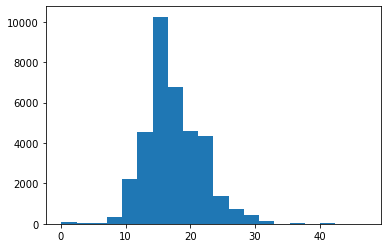

In [145]:
plt.hist(df['Fuel Barrels/Year'], bins = 20)
plt.show()

2. CO2 Emission Grams/Mile 

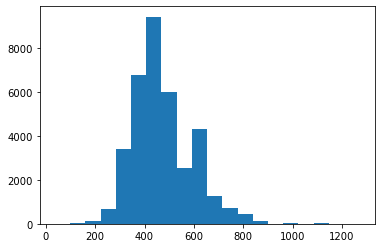

In [130]:
# your code here
plt.hist(df['CO2 Emission Grams/Mile'], bins = 20)
plt.show()

3. Combined MPG

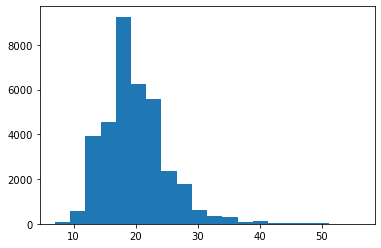

In [131]:
# your code here
plt.hist(df['Combined MPG'], bins = 20)
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [128]:
# your answer here
# All of them, there is a bell shape like structure for all of them

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

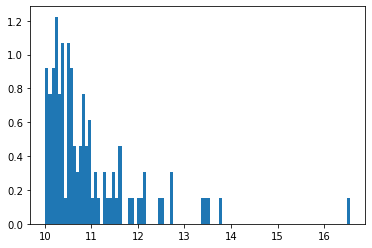

In [172]:
l = 0
r = 1
count = expon.rvs(loc = 10, scale = 1, size=100)

random = l + (r - l)*count

plt.hist(random, bins = 100, density = True)
plt.show()

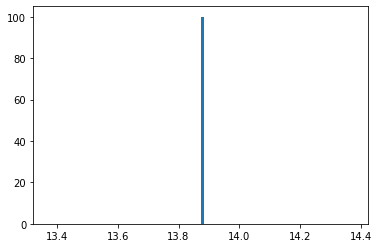

In [173]:
# your code here
l = 0
r = 1
count = expon.rvs(loc = 10, scale = 1, size=1)

random = l + (r - l)*count

plt.hist(random, bins = 100, density = True)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

3.059023205018258e-07


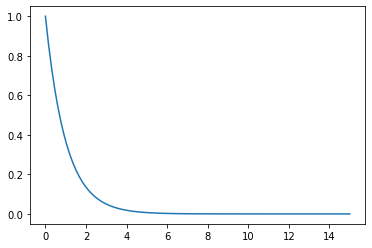

In [175]:
# your answer here
# Hint: This is same as saying P(x<15)

exp = expon(loc = 10, scale = 1)
x = np.linspace(0, 15, 100)
y = expon.pdf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x,y)

print(expon.pdf(15))

What is the probability that the customer will spend more than 15 minutes

3.059023205018258e-07


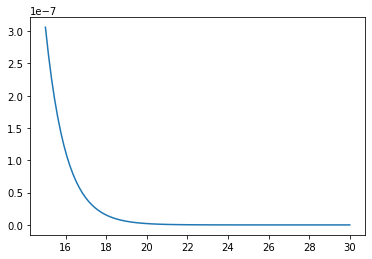

In [176]:
# your answer here


exp = expon(loc = 10, scale = 1)
x = np.linspace(15, 30, 100)
y = expon.pdf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x,y)

print(expon.pdf(15))